In [51]:
import numpy as np
from county_ratio import factor1_county
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

#get population of each county
fin = open('population_county_CA.txt','r')
fout = open('clean_CA_population.txt','w+')

population = {}

for line in fin:
    line = line.replace('County','')
    fout.write(line)
    x = line.split()
    dict_name = ''
    for word in x:
        word = word.replace(',','')
        if word.isdigit() == False:
            dict_name = dict_name + (str(word)+' ')
        else:
            pass
    population[dict_name.upper()[:-1]] = int(x[-1].replace(',',''))
fin.close()
fout.close()

In [52]:
#get number of vehicles of each county
fin = open('vehicles_number.txt','r')

n_vehicles = {}

for line in fin:
    line = line.replace(',','')
    x = line.split()
    dict_name = ''
    for word in x:
        if word.isdigit() == False:
            dict_name += (word+' ')
        else:
            pass
    n_vehicles[dict_name[:-1]] = int(x[-1])
fin.close()

In [53]:
#get area of each county
fin = open('county_area.txt','r')

area = {}

for line in fin:
    line = line.replace(',','')
    line = line.replace('sq mi','')
    line = line.replace('CA /','')
    x = line.split()
    x = x[1:-1]
    dict_name = ''
    for word in x[1:]:
        dict_name+= (word+' ')
    area[dict_name[:-1].upper()] = float(x[0])

In [54]:
#get number of accidents in each county
n_accidents = factor1_county("CA_data.csv")
n_accidents = dict(n_accidents)
new_dict = dict([(value,key) for key, value in n_accidents.items()])
for key,value in new_dict.items():
    new_dict[key] = value.upper()
n_accidents = dict([(value,key) for key,value in new_dict.items()])

In [55]:
#get population, number of vehicles and number of accidents per sq mi
population_per = {}
n_vehicles_per = {}
n_accidents_per = {}

for key, value in area.items():
    population_per[key] = population[key]/area[key]
    n_vehicles_per[key] = n_vehicles[key]/area[key]
    n_accidents_per[key] = int(n_accidents[key])/area[key]
    
population_per = {k:v for k,v in sorted(population_per.items(),key =lambda item:item[1])}

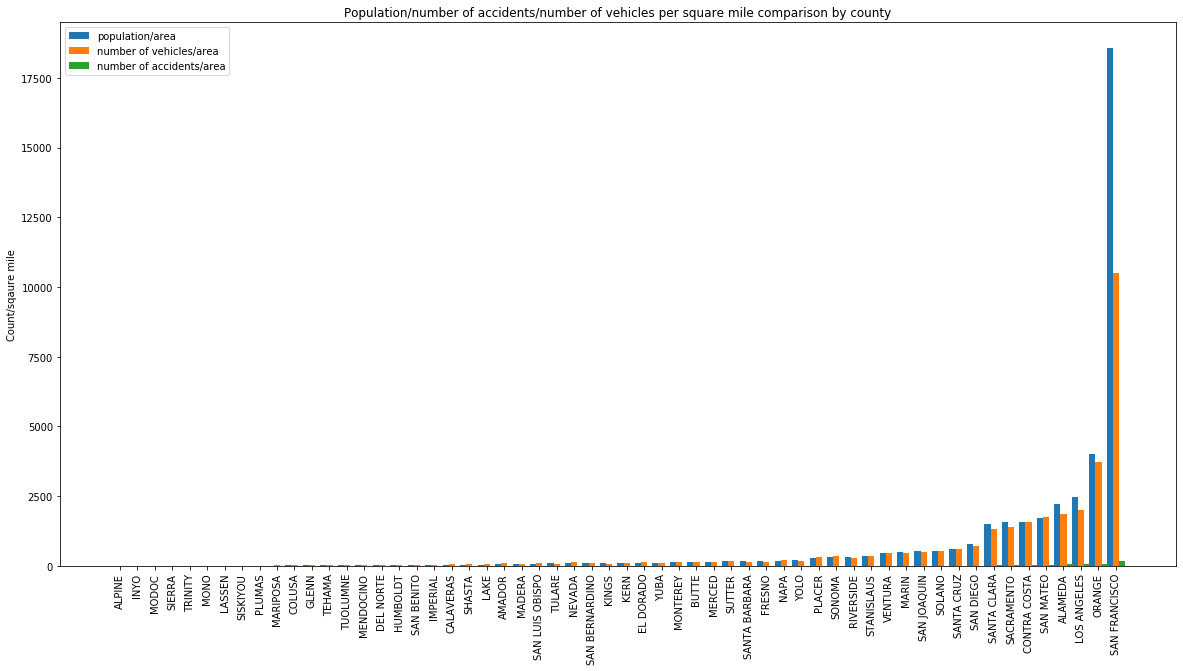

In [71]:
#plot
labels = []
population_plot = []
n_vehicles_plot =[]
n_accidents_plot =[]

for key,value in population_per.items():
    labels.append(key)
    population_plot.append(value)
    n_vehicles_plot.append(n_vehicles_per[key])
    n_accidents_plot.append(n_accidents_per[key])

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(20)
rectpop= ax.bar(x-width,population_plot,width,label = 'population/area')
rectveh = ax.bar(x,n_vehicles_plot,width,label = 'number of vehicles/area')
rectacc = ax.bar(x+width,n_accidents_plot,width,label = 'number of accidents/area')

ax.set_ylabel('Count/sqaure mile')
ax.set_title('Population/number of accidents/number of vehicles per square mile comparison by county')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.xticks(rotation = 'vertical')
plt.show()